## Basic Operations in Pandas

- data filtering
- data grouping
- quick plotting
- math operations (mean, min, median)


In [13]:
# import data (DC_properties.csv)

import pandas as pd
df = pd.read_csv('DC_properties.csv')

df.head()

,BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,KITCHENS,FIREPLACES,USECODE,LANDAREA,SOURCE,FULLADDRESS,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD
0,1,Forced Air,Y,0.0,4,1,1900.0,2015.0,1967,2.00,...,1.0,1,12,1518,Residential,3208 REAR VOLTA PLACE NW,20007,38.909370,-77.064920,Georgetown
1,4,Forced Air,Y,0.0,6,3,1922.0,2014.0,1980,2.00,...,1.0,1,11,1584,Residential,113 WEBSTER STREET NW,20011,38.944555,-77.013213,Petworth
2,4,Forced Air,Y,0.0,8,4,1918.0,2018.0,1984,2.50,...,1.0,0,12,5001,Residential,1250 HAMLIN STREET NE,20017,38.927873,-76.989294,Brookland
3,5,Forced Air,Y,0.0,8,4,1925.0,2018.0,1967,1.75,...,1.0,1,12,7500,Residential,1307 GIRARD STREET NE,20017,38.926475,-76.987470,Brookland
4,2,Hot Water Rad,N,0.0,8,4,1928.0,-1.0,1960,2.00,...,1.0,0,11,1368,Residential,3735 BENTON STREET NW,20007,38.920862,-77.075030,Glover Park


#### a) How many properties were sold in June of 2015? 

In [22]:
# set filters for the month and year
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])

month_filter = df['SALEDATE'].map(lambda x:x.month) == 6
year_filter = df['SALEDATE'].map(lambda x:x.year) == 2015

requiredMonth = df[month_filter & year_filter]
print(len(requiredMonth))

754


#### b) What is the most common type of heating mechanism, and how many properties have it?

In [23]:
# short cut method
df['HEAT'].describe()

count          97780
unique            14
top       Forced Air
freq           39238
Name: HEAT, dtype: object

#### c) Based on mean price, which neighborhood is the most expensive? Use the column ASSESSMENT_NBHD for neighborhood.

In [28]:
# groupby() neighbourhood
pd.set_option('float_format', '{:f}'.format)
df.groupby('ASSESSMENT_NBHD')['PRICE'].mean().sort_values(ascending=False).head()

ASSESSMENT_NBHD
Massachusetts Avenue Heights   2631421.109091
Berkley                        1475448.698312
Spring Valley                  1437519.540984
Kent                           1303142.609756
Georgetown                     1205854.934455
Name: PRICE, dtype: float64

#### d) Is the mean price of the most expensive neighborhood statistically different from the mean price of the second most expensive neighborhood? 

In [29]:
MAH_mean = df.groupby('ASSESSMENT_NBHD')['PRICE'].mean()['Massachusetts Avenue Heights']
Berkley_mean = df.groupby('ASSESSMENT_NBHD')['PRICE'].mean()['Berkley']

print((MAH_mean - Berkley_mean) / Berkley_mean)

0.7834717751291441


<AxesSubplot:xlabel='ASSESSMENT_NBHD'>

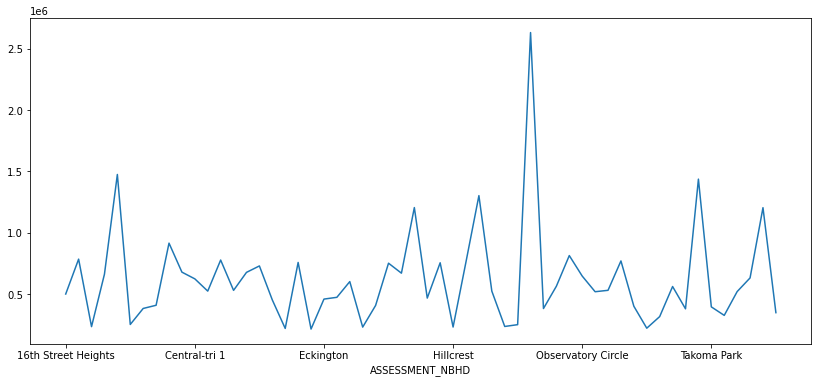

In [30]:
# quickly visualize neighbourhood mean price to check results
df.groupby('ASSESSMENT_NBHD')['PRICE'].mean().plot(figsize=(14,6))